<a href="https://colab.research.google.com/github/SharmaPratik1994/Time_series-analysis/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import os
os.getcwd()

'/content'

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Copy of POCM_HISTORICAL.csv')

<ipython-input-4-689659421f1d>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Copy of POCM_HISTORICAL.csv')


In [5]:
df.head()

,Checkout_Date,Order_Nbr,Item_Nbr,Zip_Code,WSLR_Nbr,Ship_Date,Brand,Partition,Item_Description,Category,...,Weekly_Avg_Qty_Sold,On_Hand_Inventory,On_Order_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity,LastModId,LastModMachine,LastModApp,LastModTsp
0,04/12/18,100003,5000268,63118,0,05/12/18,Bud Light - Core,Core,Bud Light Satin Flag,POCM,...,NaN,112,0.0,0,22.0,1,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,28/04/20 14:55
1,04/12/18,100012,1093107,10011,0,07/12/18,Bud Light - Core,Core,Base Stacker,POCM,...,NaN,0,0.0,0,52.0,1,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,28/04/20 14:55
2,05/12/18,100030,1090635,20772,0,13/12/18,Michelob ULTRA - Core +,Core +,NEON - MICHELOB ULTRA,POCM,...,NaN,0,0.0,0,52.0,5,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,28/04/20 14:55
3,05/12/18,100030,5003134,20772,0,13/12/18,Stella Artois - Super Premium - Import,Import,LED Neon Sign,POCM,...,NaN,0,0.0,0,52.0,10,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,28/04/20 14:55
4,05/12/18,100030,5007384,20772,0,13/12/18,Michelob ULTRA - Core +,Core +,Umbrella,POCM,...,NaN,0,0.0,0,52.0,20,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,28/04/20 14:55


In [6]:
df.describe()

,Order_Nbr,WSLR_Nbr,Carton_Factor,Lead_Date_in_Weeks,Cost,Item_Active,Weekly_Avg_Qty_Sold,On_Hand_Inventory,On_Order_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity
count,160577.000000,160577.000000,160577.000000,160533.000000,160577.000000,160577.000000,34684.000000,160577.000000,59078.000000,160577.000000,130335.000000,160577.000000
mean,144517.696526,32478.170118,3.873986,7.781640,50.748926,0.942345,157.412352,178.397504,323.770456,148.544019,63.713883,9.702598
std,33261.568649,30466.016173,18.355203,4.150249,47.399941,0.233090,199.632609,634.152831,1030.944521,916.354855,107.089086,35.590905
min,100001.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,113072.000000,0.000000,1.000000,4.000000,20.000000,1.000000,21.000000,0.000000,0.000000,0.000000,52.000000,2.000000
50%,151630.000000,30166.000000,1.000000,6.000000,33.000000,1.000000,79.000000,0.000000,0.000000,0.000000,52.000000,5.000000
75%,169819.000000,54215.000000,1.000000,8.000000,62.000000,1.000000,210.000000,0.000000,0.000000,0.000000,52.000000,10.000000
max,211677.000000,94682.000000,6000.000000,16.000000,651.000000,1.000000,1163.000000,16870.000000,6580.000000,15000.000000,4532.000000,3600.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160577 entries, 0 to 160576
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Checkout_Date              160577 non-null  object 
 1   Order_Nbr                  160577 non-null  int64  
 2   Item_Nbr                   160577 non-null  object 
 3   Zip_Code                   160577 non-null  object 
 4   WSLR_Nbr                   160577 non-null  int64  
 5   Ship_Date                  132416 non-null  object 
 6   Brand                      160577 non-null  object 
 7   Partition                  156491 non-null  object 
 8   Item_Description           160577 non-null  object 
 9   Category                   160577 non-null  object 
 10  Carton_Factor              160577 non-null  int64  
 11  City                       160576 non-null  object 
 12  State                      160559 non-null  object 
 13  Supplier                   16

In [8]:
columns_to_access = ['Checkout_Date', 'Category', 'Order_Quantity', 'Item_Description', 'Cost']
data = df[columns_to_access]


In [9]:
data.head()

,Checkout_Date,Category,Order_Quantity,Item_Description,Cost
0,04/12/18,POCM,1,Bud Light Satin Flag,12.0
1,04/12/18,POCM,1,Base Stacker,28.0
2,05/12/18,POCM,5,NEON - MICHELOB ULTRA,93.0
3,05/12/18,POCM,10,LED Neon Sign,80.0
4,05/12/18,POCM,20,Umbrella,41.5


In [10]:
data['Category'].value_counts()

POCM    160577
Name: Category, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160577 entries, 0 to 160576
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Checkout_Date     160577 non-null  object 
 1   Category          160577 non-null  object 
 2   Order_Quantity    160577 non-null  int64  
 3   Item_Description  160577 non-null  object 
 4   Cost              160577 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.1+ MB


In [12]:
data.isnull().sum()

Checkout_Date       0
Category            0
Order_Quantity      0
Item_Description    0
Cost                0
dtype: int64

In [13]:
data['Checkout_Date'] = pd.to_datetime(data['Checkout_Date'])


<ipython-input-13-37d3402963b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Checkout_Date'] = pd.to_datetime(data['Checkout_Date'])


In [14]:
data.head()

,Checkout_Date,Category,Order_Quantity,Item_Description,Cost
0,2018-04-12,POCM,1,Bud Light Satin Flag,12.0
1,2018-04-12,POCM,1,Base Stacker,28.0
2,2018-05-12,POCM,5,NEON - MICHELOB ULTRA,93.0
3,2018-05-12,POCM,10,LED Neon Sign,80.0
4,2018-05-12,POCM,20,Umbrella,41.5


In [15]:
data['Item_Description'].value_counts()

Bud Light Seltzer - Case Stacker                 1442
Case Stacker                                     1394
Bud Light Super Bowl LIV Enhanced Pole Topper    1281
Display Wrap                                     1276
Coaster                                          1138
                                                 ... 
Cornhole Bag Toss - Fresno State                    1
Tin Tacker - Fresno St.                             1
Cornhole Bag Toss - New York Giants                 1
Beck's Drip Rail Bar Mat.                           1
Certified Fresh Coaster                             1
Name: Item_Description, Length: 3367, dtype: int64

## Feature Engineering

In [16]:
data['Year'] = data['Checkout_Date'].dt.year
data['Month'] = data['Checkout_Date'].dt.month
data['Day'] = data['Checkout_Date'].dt.day
data['DayOfWeek'] = data['Checkout_Date'].dt.dayofweek


<ipython-input-16-62143eb439d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Checkout_Date'].dt.year
<ipython-input-16-62143eb439d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Checkout_Date'].dt.month
<ipython-input-16-62143eb439d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [17]:
data.head(600)

,Checkout_Date,Category,Order_Quantity,Item_Description,Cost,Year,Month,Day,DayOfWeek
0,2018-04-12,POCM,1,Bud Light Satin Flag,12.0,2018,4,12,3
1,2018-04-12,POCM,1,Base Stacker,28.0,2018,4,12,3
2,2018-05-12,POCM,5,NEON - MICHELOB ULTRA,93.0,2018,5,12,5
3,2018-05-12,POCM,10,LED Neon Sign,80.0,2018,5,12,5
4,2018-05-12,POCM,20,Umbrella,41.5,2018,5,12,5
...,...,...,...,...,...,...,...,...,...
595,2018-12-21,POCM,50,Goose Island Large Tap Handle,20.0,2018,12,21,4
596,2018-12-21,POCM,30,Goose Island Large Tap Handle,19.0,2018,12,21,4
597,2018-12-21,POCM,30,Signature Shotgun Large Tap Handle,23.0,2018,12,21,4
598,2018-12-21,POCM,20,Breckenridge Small Shotgun Tap Handle,18.0,2018,12,21,4


In [18]:
aggregated_df = data.groupby('Checkout_Date').agg({
    'Order_Quantity': 'sum',
    'Cost': 'sum'
}).reset_index()

aggregated_df = aggregated_df.sort_values('Checkout_Date')

aggregated_df.head()
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 469
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Checkout_Date   470 non-null    datetime64[ns]
 1   Order_Quantity  470 non-null    int64         
 2   Cost            470 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 14.7 KB


In [19]:

aggregated_df.head(500)

,Checkout_Date,Order_Quantity,Cost
0,2018-04-12,2,40.00
1,2018-05-12,79,506.01
2,2018-06-12,422,1836.00
3,2018-07-12,468,3196.71
4,2018-08-12,111,767.00
...,...,...,...
465,2020-11-05,2749,38553.75
466,2020-12-01,114,145.00
467,2020-12-02,2431,3879.07
468,2020-12-03,698,2826.36


In [20]:
aggregated_df['Year'] =aggregated_df['Checkout_Date'].dt.year
aggregated_df['Month'] = aggregated_df['Checkout_Date'].dt.month
aggregated_df['Day'] = aggregated_df['Checkout_Date'].dt.day
aggregated_df['DayOfWeek'] = aggregated_df['Checkout_Date'].dt.dayofweek

aggregated_df.head(500)


,Checkout_Date,Order_Quantity,Cost,Year,Month,Day,DayOfWeek
0,2018-04-12,2,40.00,2018,4,12,3
1,2018-05-12,79,506.01,2018,5,12,5
2,2018-06-12,422,1836.00,2018,6,12,1
3,2018-07-12,468,3196.71,2018,7,12,3
4,2018-08-12,111,767.00,2018,8,12,6
...,...,...,...,...,...,...,...
465,2020-11-05,2749,38553.75,2020,11,5,3
466,2020-12-01,114,145.00,2020,12,1,1
467,2020-12-02,2431,3879.07,2020,12,2,2
468,2020-12-03,698,2826.36,2020,12,3,3


In [21]:
aggregated_df['Month'], aggregated_df['Day'] = aggregated_df['Day'], aggregated_df['Month']

In [22]:
aggregated_df.head(500)

,Checkout_Date,Order_Quantity,Cost,Year,Month,Day,DayOfWeek
0,2018-04-12,2,40.00,2018,12,4,3
1,2018-05-12,79,506.01,2018,12,5,5
2,2018-06-12,422,1836.00,2018,12,6,1
3,2018-07-12,468,3196.71,2018,12,7,3
4,2018-08-12,111,767.00,2018,12,8,6
...,...,...,...,...,...,...,...
465,2020-11-05,2749,38553.75,2020,5,11,3
466,2020-12-01,114,145.00,2020,1,12,1
467,2020-12-02,2431,3879.07,2020,2,12,2
468,2020-12-03,698,2826.36,2020,3,12,3


{'whiskers': [<matplotlib.lines.Line2D at 0x7cbaccbd6e60>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbaccbd73a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbaccbd6bc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cbaccbd78e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cbaccbd7b80>],
 'means': []}

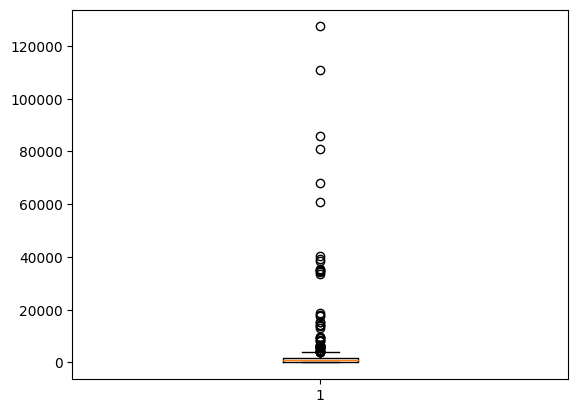

In [23]:
plt.boxplot(aggregated_df['Order_Quantity'])

In [24]:

Q1 = aggregated_df['Order_Quantity'].quantile(0.25)
Q2 = aggregated_df['Order_Quantity'].quantile(0.75)
Q3 = aggregated_df['Order_Quantity'].quantile(0.01)
Q4 = aggregated_df['Order_Quantity'].quantile(0.99)
IQR = Q2-Q1

lower = Q1 - (1.5 * IQR)
upper = Q2 + (1.5 * IQR)
print("25th percentile:",Q1)
print("75th percentile:",Q2)
print("one percentile:",Q3)
print("99th percentile:",Q4)
print(lower)
print(upper)

25th percentile: 197.5
75th percentile: 1641.0
one percentile: 1.0
99th percentile: 63173.790000000015
-1967.75
3806.25


In [25]:
lower_whisker = -1657.25
upper_whisker = 3260.75

# Winsorize the 'Order_Quantity' column using the upper and lower whiskers
aggregated_df['Order_Quantity_winsorized'] = aggregated_df['Order_Quantity']

# Replace values below the lower whisker with the lower whisker value
aggregated_df.loc[aggregated_df['Order_Quantity'] < lower_whisker, 'Order_Quantity_winsorized'] = lower_whisker

# Replace values above the upper whisker with the upper whisker value
aggregated_df.loc[aggregated_df['Order_Quantity'] > upper_whisker, 'Order_Quantity_winsorized'] = upper_whisker

{'whiskers': [<matplotlib.lines.Line2D at 0x7cbaccaedcf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbaccaee230>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbaccaeda50>],
 'medians': [<matplotlib.lines.Line2D at 0x7cbaccaee770>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cbaccaeea10>],
 'means': []}

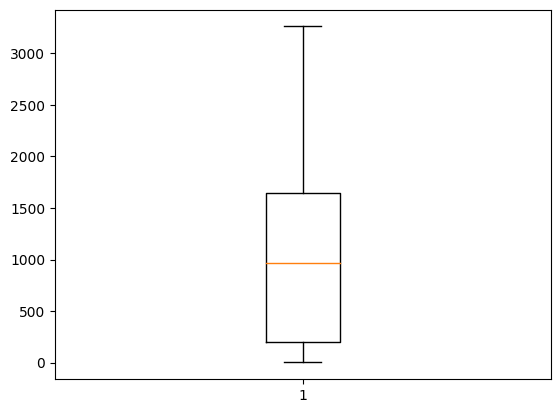

In [26]:
plt.boxplot(aggregated_df['Order_Quantity_winsorized'])

25th percentile: 2.0
75th percentile: 10.0
one percentile: 1.0
99th percentile: 80.0
-10.0
22.0


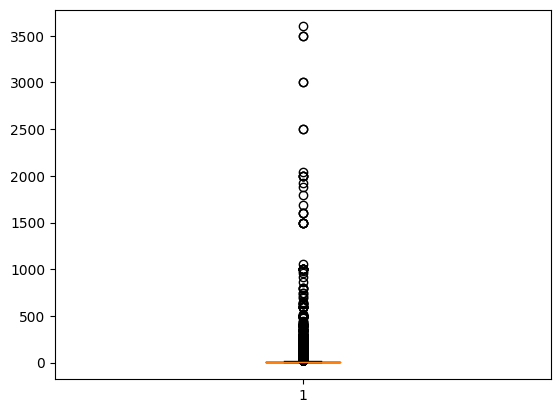

In [27]:
plt.boxplot(data['Order_Quantity'])

Q1 = data['Order_Quantity'].quantile(0.25)
Q2 = data['Order_Quantity'].quantile(0.75)
Q3 = data['Order_Quantity'].quantile(0.01)
Q4 = data['Order_Quantity'].quantile(0.99)
IQR = Q2-Q1

lower = Q1 - (1.5 * IQR)
upper = Q2 + (1.5 * IQR)
print("25th percentile:",Q1)
print("75th percentile:",Q2)
print("one percentile:",Q3)
print("99th percentile:",Q4)
print(lower)
print(upper)

<ipython-input-28-c81d0723954f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Order_Quantity'] = mstats.winsorize(data['Order_Quantity'], limits=[0.01, 0.01])


{'whiskers': [<matplotlib.lines.Line2D at 0x7cbacc9dd8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbacc994880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbacc9dd630>],
 'medians': [<matplotlib.lines.Line2D at 0x7cbacc995450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cbacc994220>],
 'means': []}

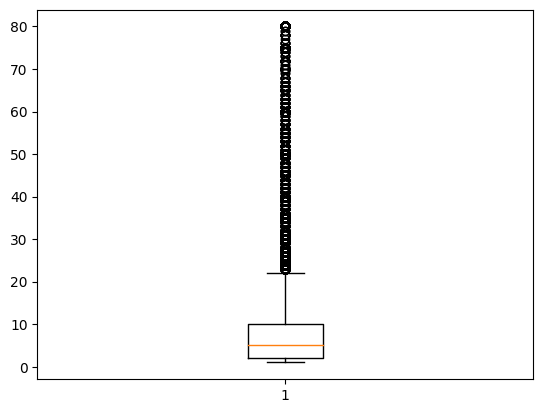

In [28]:
import numpy as np
from scipy.stats import mstats


# Winsorize the 'Order_Quantity' column using a lower limit of the 1st percentile and an upper limit of the 99th percentile
data['Order_Quantity'] = mstats.winsorize(data['Order_Quantity'], limits=[0.01, 0.01])

plt.boxplot(data['Order_Quantity'])

In [29]:
import matplotlib.pyplot as plt

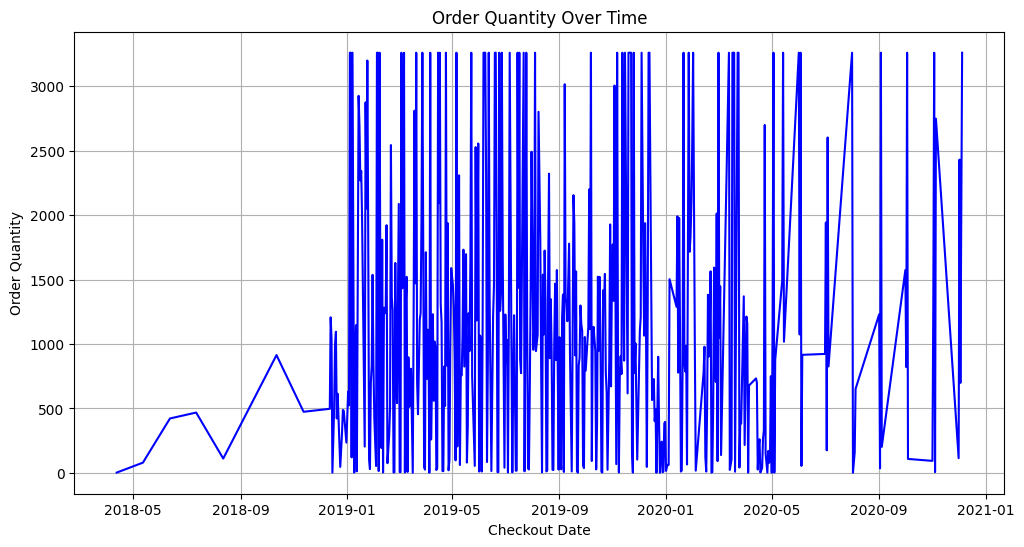

In [30]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(aggregated_df['Checkout_Date'], aggregated_df['Order_Quantity_winsorized'], linestyle='-', color='b')

plt.title('Order Quantity Over Time')
plt.xlabel('Checkout Date')
plt.ylabel('Order Quantity')
plt.grid(True)

# Show the plot
plt.show()

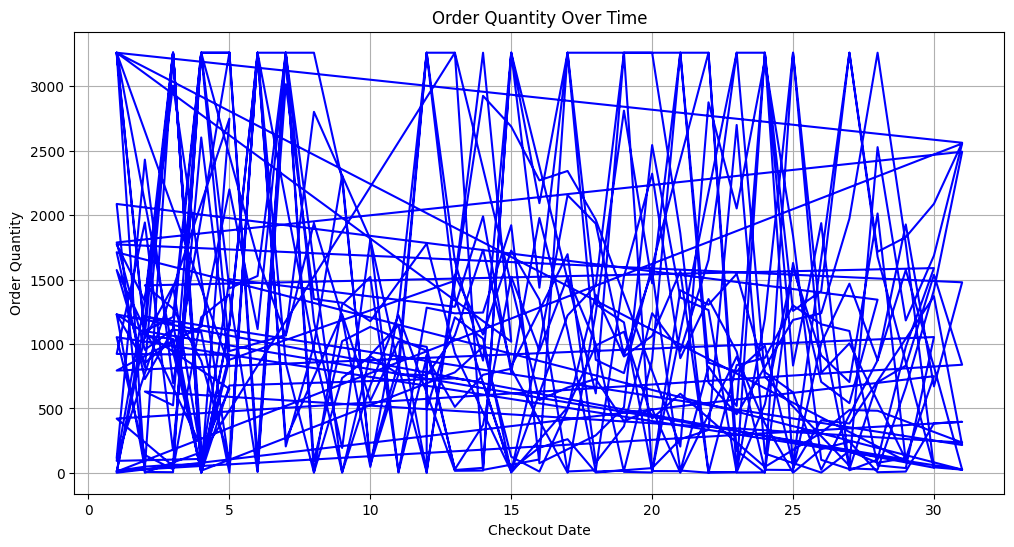

In [31]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(aggregated_df['Month'], aggregated_df['Order_Quantity_winsorized'], linestyle='-', color='b')

plt.title('Order Quantity Over Time')
plt.xlabel('Checkout Date')
plt.ylabel('Order Quantity')
plt.grid(True)

# Show the plot
plt.show()

In [32]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [33]:
aggregated_df.set_index('Checkout_Date')

,Order_Quantity,Cost,Year,Month,Day,DayOfWeek,Order_Quantity_winsorized
Checkout_Date,,,,,,,
2018-04-12,2,40.00,2018,12,4,3,2.00
2018-05-12,79,506.01,2018,12,5,5,79.00
2018-06-12,422,1836.00,2018,12,6,1,422.00
2018-07-12,468,3196.71,2018,12,7,3,468.00
2018-08-12,111,767.00,2018,12,8,6,111.00
...,...,...,...,...,...,...,...
2020-11-05,2749,38553.75,2020,5,11,3,2749.00
2020-12-01,114,145.00,2020,1,12,1,114.00
2020-12-02,2431,3879.07,2020,2,12,2,2431.00


In [50]:
aggregated_df.reset_index(inplace=True)
aggregated_df.head()

,index,Checkout_Date,Order_Quantity,Cost,Year,Month,Day,DayOfWeek,Order_Quantity_winsorized
0,0,2018-04-12,2,40.00,2018,12,4,3,2.0
1,1,2018-05-12,79,506.01,2018,12,5,5,79.0
2,2,2018-06-12,422,1836.00,2018,12,6,1,422.0
3,3,2018-07-12,468,3196.71,2018,12,7,3,468.0
4,4,2018-08-12,111,767.00,2018,12,8,6,111.0


In [60]:
aggregated_df['New_Date'] = pd.to_datetime(aggregated_df['Year'].astype(str) + '-' + aggregated_df['Day'].astype(str) + '-' + aggregated_df['Month'].astype(str))

In [61]:
aggregated_df.head()

,index,Checkout_Date,Order_Quantity,Cost,Year,Month,Day,DayOfWeek,Order_Quantity_winsorized,New_Date
0,0,2018-04-12,2,40.00,2018,12,4,3,2.0,2018-04-12
1,1,2018-05-12,79,506.01,2018,12,5,5,79.0,2018-05-12
2,2,2018-06-12,422,1836.00,2018,12,6,1,422.0,2018-06-12
3,3,2018-07-12,468,3196.71,2018,12,7,3,468.0,2018-07-12
4,4,2018-08-12,111,767.00,2018,12,8,6,111.0,2018-08-12


In [62]:
columns_select = ['New_Date','Order_Quantity_winsorized']
data_copy = aggregated_df[columns_select]
data_copy.head()



,New_Date,Order_Quantity_winsorized
0,2018-04-12,2.0
1,2018-05-12,79.0
2,2018-06-12,422.0
3,2018-07-12,468.0
4,2018-08-12,111.0


In [64]:

data_copy.set_index('New_Date', inplace=True)
data_copy.head()

,Order_Quantity_winsorized
New_Date,
2018-04-12,2.0
2018-05-12,79.0
2018-06-12,422.0
2018-07-12,468.0
2018-08-12,111.0


In [65]:
data_daily =data_copy['Order_Quantity_winsorized'].resample('D').sum()

print("Daily Resampled Data:")
print(data_daily.head())

Daily Resampled Data:
New_Date
2018-04-12    2.0
2018-04-13    0.0
2018-04-14    0.0
2018-04-15    0.0
2018-04-16    0.0
Freq: D, Name: Order_Quantity_winsorized, dtype: float64


In [54]:


# Resample at daily, weekly, monthly, and yearly frequencies
data_daily = data_copy['Order_Quantity_winsorized'].resample('D').sum()
data_weekly = data_copy['Order_Quantity_winsorized'].resample('W').sum()
data_monthly = data_copy['Order_Quantity_winsorized'].resample('M').sum()
data_yearly = data_copy['Order_Quantity_winsorized'].resample('Y').sum()


In [56]:


# Resample at daily frequency
data_daily = data_copy.resample('D').sum()

print("Daily Resampled Data:")
print(data_daily.head())





Daily Resampled Data:
               index  Order_Quantity  Cost  Year  Month  Day  DayOfWeek  \
Checkout_Date                                                             
2018-04-12         0               2  40.0  2018     12    4          3   
2018-04-13         0               0   0.0     0      0    0          0   
2018-04-14         0               0   0.0     0      0    0          0   
2018-04-15         0               0   0.0     0      0    0          0   
2018-04-16         0               0   0.0     0      0    0          0   

               Order_Quantity_winsorized  
Checkout_Date                             
2018-04-12                           2.0  
2018-04-13                           0.0  
2018-04-14                           0.0  
2018-04-15                           0.0  
2018-04-16                           0.0  


In [46]:
data_copy.head()

,Order_Quantity,Cost,Year,Month,Day,DayOfWeek,Order_Quantity_winsorized
Checkout_Date,,,,,,,
2018-04-12,2,40.00,2018,12,4,3,2.0
2018-05-12,79,506.01,2018,12,5,5,79.0
2018-06-12,422,1836.00,2018,12,6,1,422.0
2018-07-12,468,3196.71,2018,12,7,3,468.0
2018-08-12,111,767.00,2018,12,8,6,111.0


In [55]:
# Print the resampled data for verification
print("Daily Resampled Data:")
print(data_daily.head())

print("\nWeekly Resampled Data:")
print(data_weekly.head())

print("\nMonthly Resampled Data:")
print(data_monthly.head())

print("\nYearly Resampled Data:")
print(data_yearly.head())


Daily Resampled Data:
Checkout_Date
2018-04-12    2.0
2018-04-13    0.0
2018-04-14    0.0
2018-04-15    0.0
2018-04-16    0.0
Freq: D, Name: Order_Quantity_winsorized, dtype: float64

Weekly Resampled Data:
Checkout_Date
2018-04-15     2.0
2018-04-22     0.0
2018-04-29     0.0
2018-05-06     0.0
2018-05-13    79.0
Freq: W-SUN, Name: Order_Quantity_winsorized, dtype: float64

Monthly Resampled Data:
Checkout_Date
2018-04-30      2.0
2018-05-31     79.0
2018-06-30    422.0
2018-07-31    468.0
2018-08-31    111.0
Freq: M, Name: Order_Quantity_winsorized, dtype: float64

Yearly Resampled Data:
Checkout_Date
2018-12-31     10408.00
2019-12-31    404525.75
2020-12-31    136743.25
Freq: A-DEC, Name: Order_Quantity_winsorized, dtype: float64


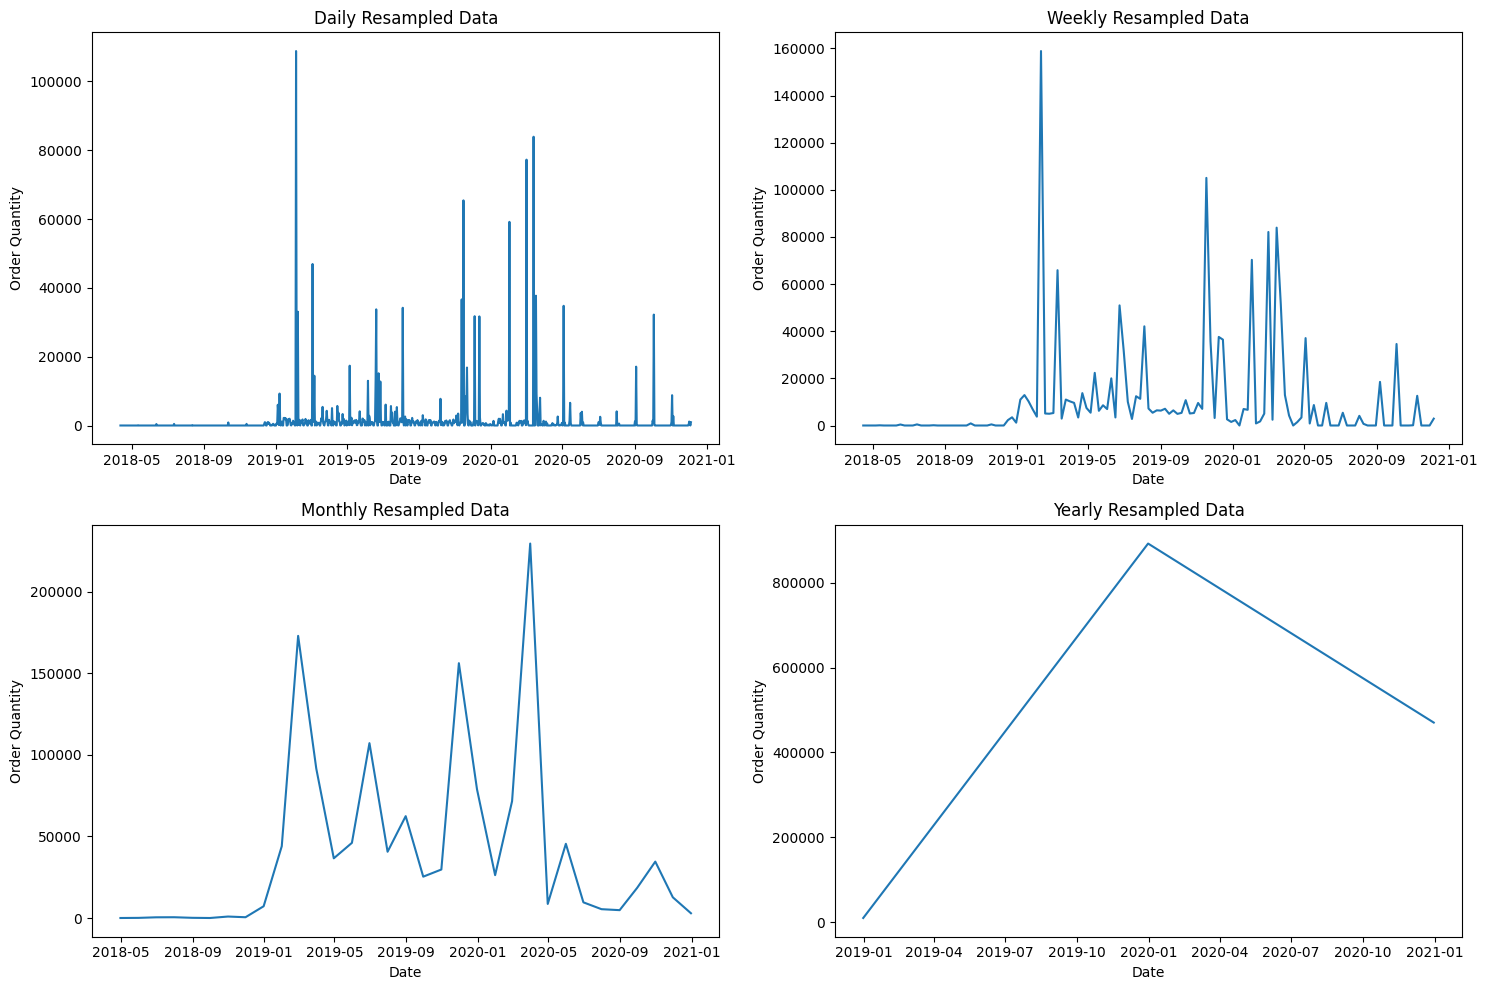

In [36]:
import matplotlib.pyplot as plt

# Plotting the resampled data
plt.figure(figsize=(15, 10))

# Daily resampled data
plt.subplot(2, 2, 1)
plt.plot(data_daily)
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.title('Daily Resampled Data')

# Weekly resampled data
plt.subplot(2, 2, 2)
plt.plot(data_weekly)
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.title('Weekly Resampled Data')

# Monthly resampled data
plt.subplot(2, 2, 3)
plt.plot(data_monthly)
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.title('Monthly Resampled Data')

# Yearly resampled data
plt.subplot(2, 2, 4)
plt.plot(data_yearly)
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.title('Yearly Resampled Data')

plt.tight_layout()
plt.show()


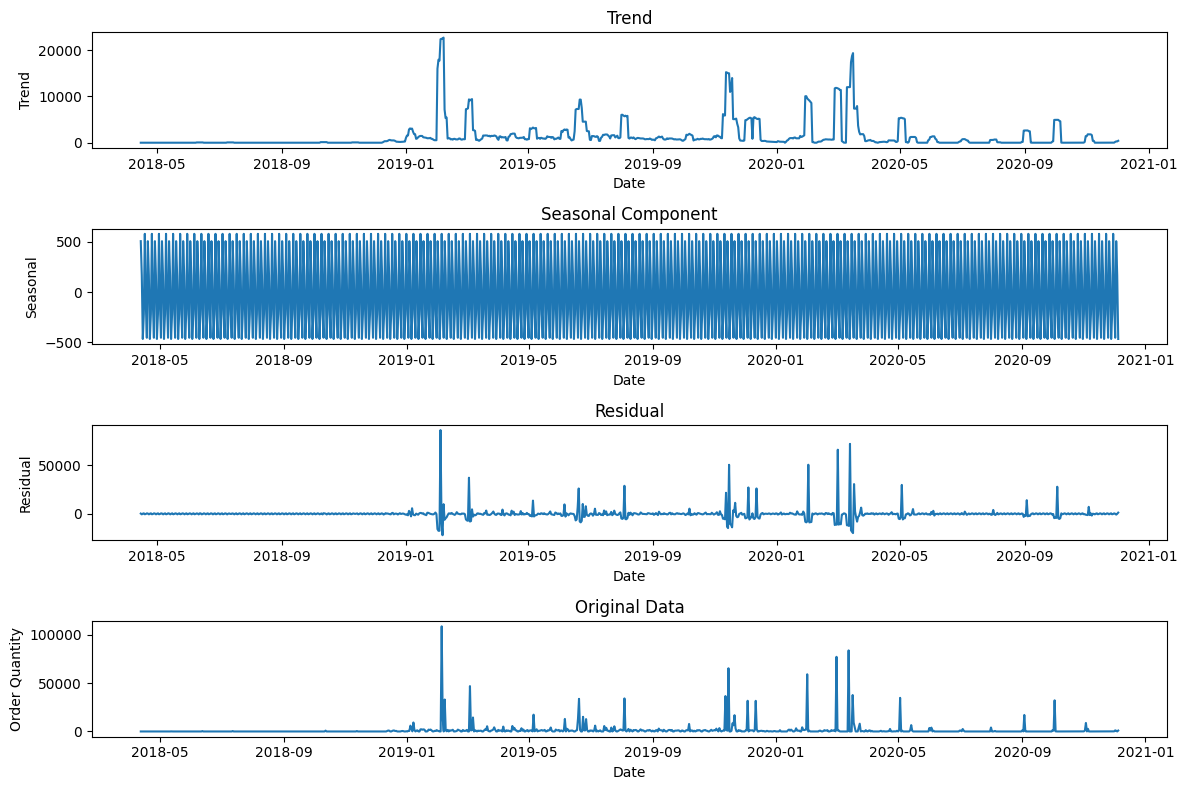

In [37]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(data_daily, model='additive')

# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual')

plt.subplot(4, 1, 4)
plt.plot(data_daily)
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.title('Original Data')

plt.tight_layout()
plt.show()


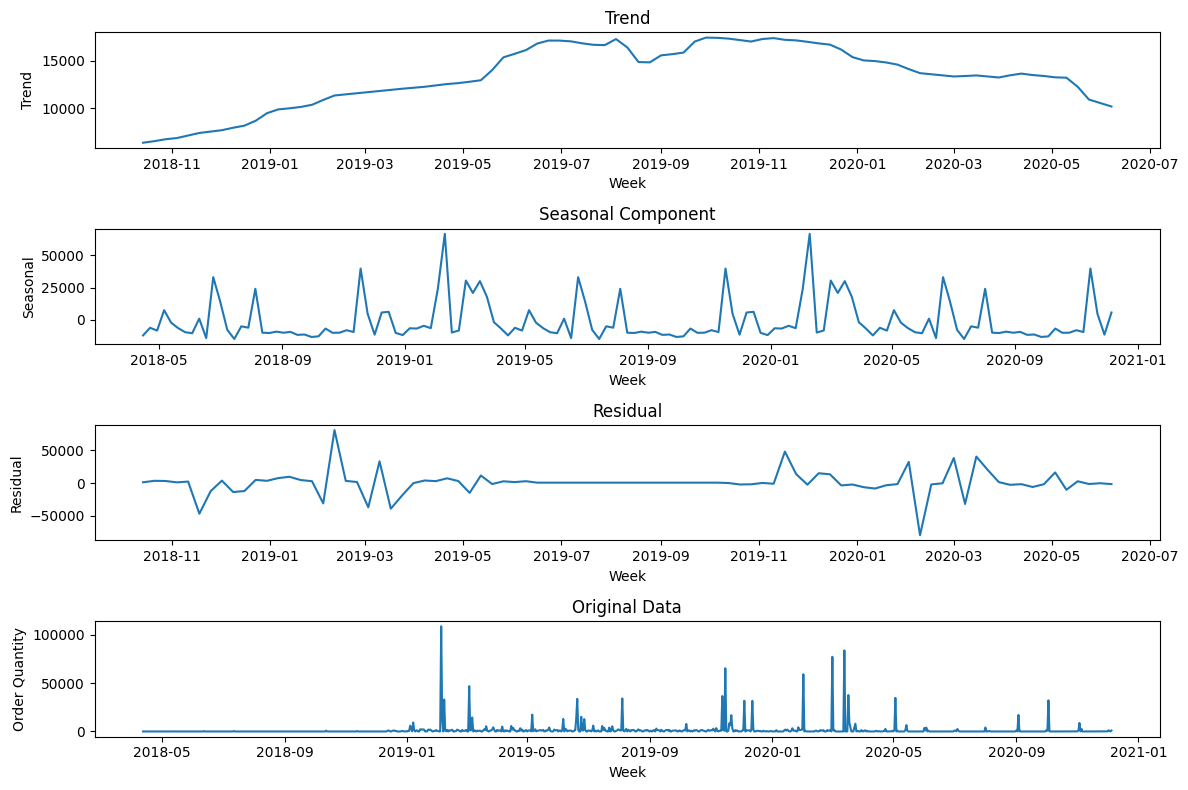

In [38]:


# Perform seasonal decomposition
result = seasonal_decompose(data_weekly, model='additive')

# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.xlabel('Week')
plt.ylabel('Trend')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.xlabel('Week')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.xlabel('Week')
plt.ylabel('Residual')
plt.title('Residual')

plt.subplot(4, 1, 4)
plt.plot(data_daily)
plt.xlabel('Week')
plt.ylabel('Order Quantity')
plt.title('Original Data')

plt.tight_layout()
plt.show()


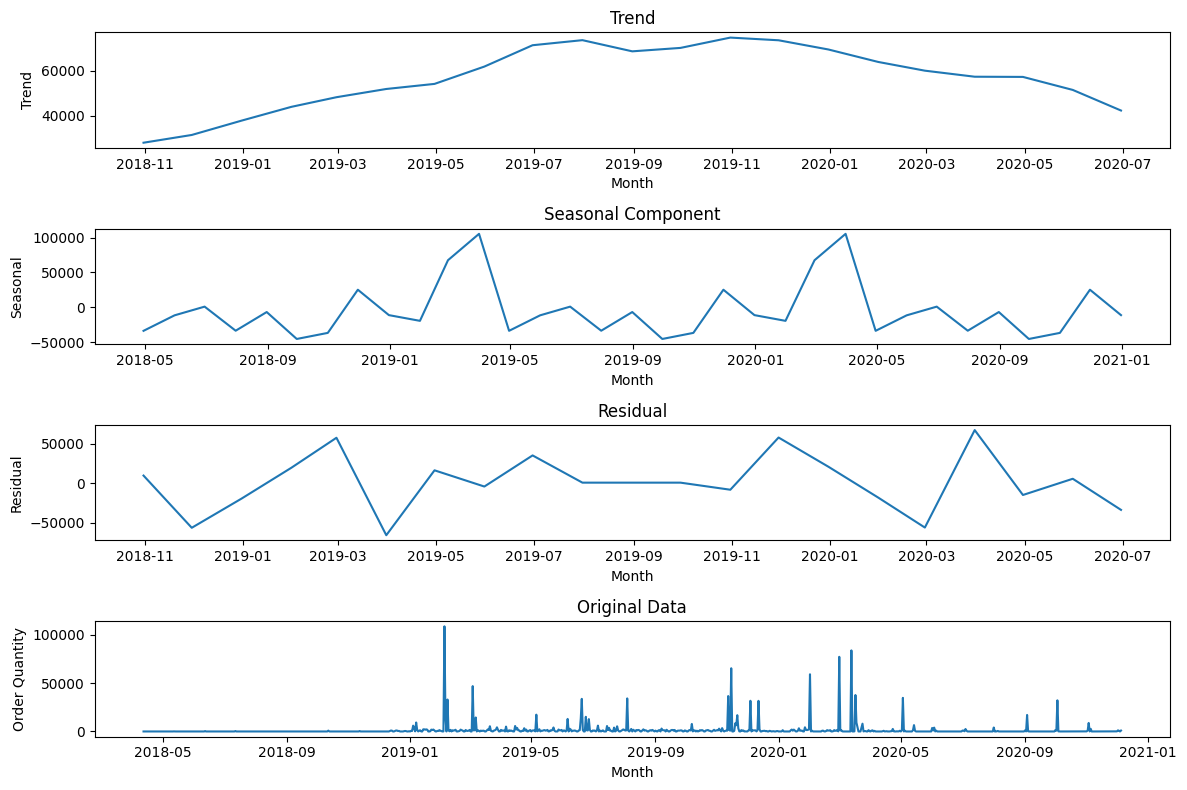

In [39]:


# Perform seasonal decomposition
result = seasonal_decompose(data_monthly, model='additive')

# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.xlabel('Month')
plt.ylabel('Trend')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.xlabel('Month')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.xlabel('Month')
plt.ylabel('Residual')
plt.title('Residual')

plt.subplot(4, 1, 4)
plt.plot(data_daily)
plt.xlabel('Month')
plt.ylabel('Order Quantity')
plt.title('Original Data')

plt.tight_layout()
plt.show()


In [40]:
residuals = result.resid.dropna()

In [41]:
from statsmodels.tsa.stattools import adfuller
def perform_adf_test(time_series):
    # Perform Dickey-Fuller test:
    result = adfuller(time_series, autolag='AIC')

    print('Augmented Dickey-Fuller Test:')
    print('Test Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    # Compare the test statistic with critical values
    if result[0] < result[4]['5%']:
        print('Result: Series is stationary (rejects the null hypothesis)')
    else:
        print('Result: Series is non-stationary (fails to reject the null hypothesis)')

# Call the function to perform the ADF test on residuals
perform_adf_test(residuals)

Augmented Dickey-Fuller Test:
Test Statistic: -6.475467185399312
p-value: 1.3345717280075926e-08
Critical Values: {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}
Result: Series is stationary (rejects the null hypothesis)


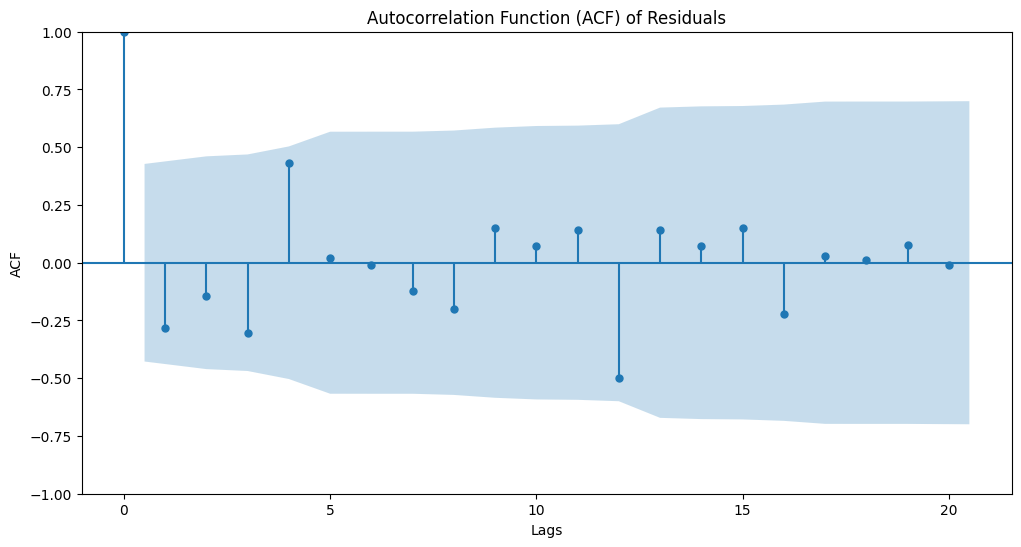

In [42]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'residuals' is the variable containing your residuals
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=20, ax=plt.gca())
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()



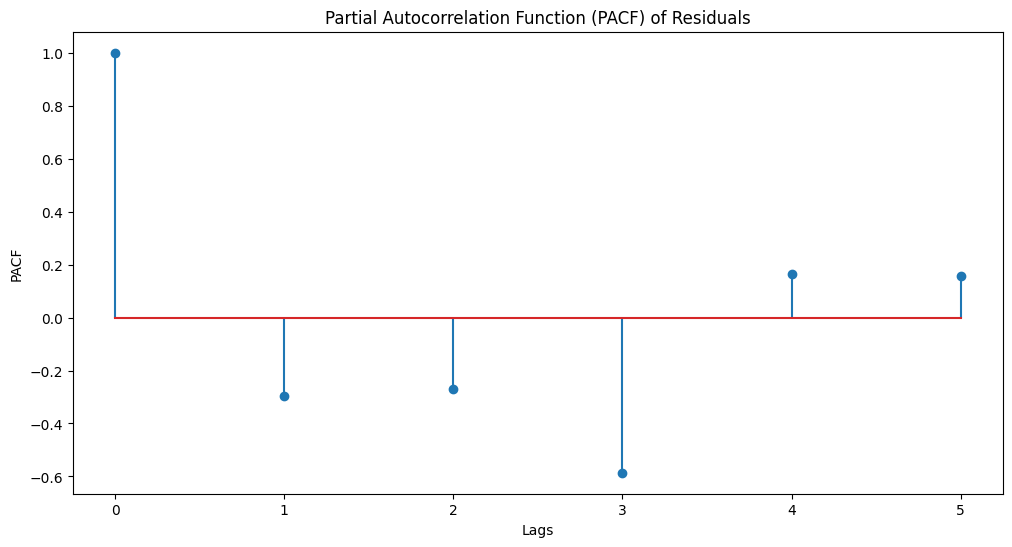

In [43]:
# Plot PACF
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf

max_lags_pacf = min(5, len(residuals) - 1)
pacf_values = pacf(residuals, nlags=max_lags_pacf)

# Plot PACF
plt.figure(figsize=(12, 6))
plt.stem(np.arange(max_lags_pacf + 1), pacf_values)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.show()
